# _Assigment - 4_
## Apply Naive Bayes to Amazon reviews 
##### Note: Used 160K review 80K positive and 80K negative

### Revised 

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sn

from sklearn.naive_bayes import MultinomialNB 
from sklearn.metrics import accuracy_score
# from sklearn import cross_validation
from sklearn.model_selection import cross_val_score
#from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score,precision_score,recall_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_pickle('./Amazon_80000.pkl')
#sorting values TBS
df = df.sort_values(['Time'],ascending=True)

In [3]:
#Creating Train and test data (80-20 split, Since i ahve small dataset i need more data for taining
#                               therefore converted in 80-20 split instead of 70-30)
## 80% of sorted data will = Total number of rows (sorted) *0.8
X_train = df.iloc[:int(len(df)*.8),1] 
Y_train = df.iloc[:int(len(df)*.8),-1]
# len(Y_train)== len(X_train)
X_test = df.iloc[int(len(df)*.8)+1:,1] 
Y_test = df.iloc[int(len(df)*.8)+1:,-1]
# len(Y_test)== len(X_test)

In [4]:
# Label encoding
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
Ytrain = le.fit_transform(Y_train)
Ytest = le.transform(Y_test)

# BoW

In [5]:
# #BoW without bigram
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
Xtrain1 = vectorizer.fit_transform(X_train.values)
Xtest1 = vectorizer.transform(X_test.values)
# Xtest.shape

In [6]:
score_1 = [] 
alpha = np.arange(0.001,10,0.1)
# alpha.shape
for Alpha in alpha:
    clf=MultinomialNB(alpha=Alpha)
    scores = cross_val_score(clf, Xtrain1, Ytrain, cv=10, scoring='accuracy')    
#     print('Aplha =',round(Alpha,5),'\t\t\tScore =',round(scores.mean(),5))
    
    score_1.append(scores.mean())

In [7]:
# changing to misclassification error
MSE_1 = [1 - x for x in score_1]
Training_Error1=round(1-max(score_1),4)
alpha_BoW = round(alpha[MSE_1.index(min(MSE_1))],3)

In [8]:
clf1=MultinomialNB(alpha=alpha_BoW)
clf1.fit( Xtrain1, Ytrain)
pred_BoW=clf1.predict(Xtest1)
Accuracy1=round(accuracy_score(Ytest,pred_BoW,normalize=True),4)
testError1 = 1-Accuracy1

In [9]:
#confusion matrix
cm1=confusion_matrix(Ytest, pred_BoW)
p1=precision_score(Ytest, pred_BoW, average=None)
r1=recall_score(Ytest, pred_BoW, average=None)

f1_1= (f1_score(Ytest, pred_BoW, average=None))
df_cm1 = pd.DataFrame(cm1,columns=[le.inverse_transform(0),le.inverse_transform(1)]
                      ,index=[le.inverse_transform(0),le.inverse_transform(1)])

In [10]:
#BoW Feature importance
features = vectorizer.get_feature_names()
feature_count = clf1.feature_count_
class_count = clf1.class_count_
pos_points_prob_sort = clf1.feature_log_prob_[1, :].argsort()
neg_points_prob_sort = clf1.feature_log_prob_[0, :].argsort()
log_prob = clf1.feature_log_prob_
feature_prob= pd.DataFrame(log_prob, columns=features).T
feature_prob.columns = [le.inverse_transform(0),le.inverse_transform(1)]
top_positive_BoW = feature_prob['positive'].sort_values(ascending=False)[:10]
top_negative_BoW = feature_prob['negative'].sort_values(ascending=False)[:10]

positive_BoW=  pd.Series.to_frame(top_positive_BoW)
positive_BoW.reset_index(level=0, inplace=True)
positive_BoW.columns = ['BoW_Words_Pos','BoW_Prob']

negative_BoW=  pd.Series.to_frame(top_negative_BoW)
negative_BoW.reset_index(level=0, inplace=True)
negative_BoW.columns = ['BoW_Words_neg','BoW_Prob']
BoW_FI= pd.concat([positive_BoW,negative_BoW], axis=1)
print('Feature importance - BoW')
BoW_FI

Feature importance - BoW


,BoW_Words_Pos,BoW_Prob,BoW_Words_neg,BoW_Prob
0,like,-4.532175,tast,-4.384049
1,tast,-4.656209,like,-4.419855
2,flavor,-4.747460,product,-4.641339
3,love,-4.752727,one,-4.869682
4,good,-4.785821,flavor,-4.884697
5,great,-4.847428,would,-4.997784
6,one,-4.879224,food,-4.999080
7,use,-4.961709,tri,-5.009562
8,coffe,-5.004245,coffe,-5.144018
9,tea,-5.015235,good,-5.190227


# Tf-IDF

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf_idf_vect = TfidfVectorizer()
Xtrain_tf_idf = tf_idf_vect.fit_transform(X_train.values)
Xtest_tf_idf = tf_idf_vect.transform(X_test.values)

In [12]:
score_2 = [] 
for Alpha in alpha:
    clf=MultinomialNB(alpha=Alpha)
    scores = cross_val_score(clf, Xtrain_tf_idf, Ytrain, cv=10, scoring='accuracy')    
#     print('Aplha =',round(Alpha,5),'\t\t\tScore =',round(scores.mean(),5))
    score_2.append(scores.mean())

In [13]:
# changing to misclassification error
MSE_2 = [1 - x for x in score_2]
Training_Error2=round(1-max(score_2),4)
alpha_tfidf = round(alpha[MSE_2.index(min(MSE_2))],3)

In [14]:
clf2=MultinomialNB(alpha=alpha_tfidf)
clf2.fit( Xtrain_tf_idf, Ytrain)
pred_tfidf=clf2.predict(Xtest_tf_idf)
Accuracy2=round(accuracy_score(Ytest,pred_tfidf,normalize=True),4)
testError2 = 1-Accuracy2

In [15]:
#confusion matrix
cm2=confusion_matrix(Ytest, pred_tfidf)
p2=precision_score(Ytest, pred_tfidf, average=None)
r2=recall_score(Ytest, pred_tfidf, average=None)

f1_2= (f1_score(Ytest, pred_tfidf, average=None))
df_cm2 = pd.DataFrame(cm2,columns=[le.inverse_transform(0),le.inverse_transform(1)]
                      ,index=[le.inverse_transform(0),le.inverse_transform(1)])

In [16]:
#BoW Feature importance
features = tf_idf_vect.get_feature_names()
feature_count = clf2.feature_count_
class_count = clf2.class_count_
pos_points_prob_sort = clf2.feature_log_prob_[1, :].argsort()
neg_points_prob_sort = clf2.feature_log_prob_[0, :].argsort()
log_prob = clf2.feature_log_prob_
feature_prob= pd.DataFrame(log_prob, columns=features).T
feature_prob.columns = [le.inverse_transform(0),le.inverse_transform(1)]
top_positive_tfidf = feature_prob['positive'].sort_values(ascending=False)[:10]
top_negative_tfidf = feature_prob['negative'].sort_values(ascending=False)[:10]

positive=  pd.Series.to_frame(top_positive_tfidf)
positive.reset_index(level=0, inplace=True)
positive.columns = ['Tf-IDF_Words_Pos','Tf-IDF_Prob']

negative=  pd.Series.to_frame(top_negative_tfidf)
negative.reset_index(level=0, inplace=True)
negative.columns = ['TFIDF_Words_neg','TFIDF_Prob']
TfIDF_FI= pd.concat([positive,negative], axis=1)
print('Feature importance - TF-IDF')
TfIDF_FI

Feature importance - TF-IDF


,Tf-IDF_Words_Pos,Tf-IDF_Prob,TFIDF_Words_neg,TFIDF_Prob
0,love,-5.733461,tast,-5.632706
1,great,-5.741828,like,-5.760929
2,good,-5.896232,product,-5.868762
3,coffe,-5.900960,coffe,-6.044130
4,tea,-5.931254,flavor,-6.055919
5,flavor,-5.940843,one,-6.158917
6,like,-5.942255,would,-6.159458
7,tast,-5.974403,tri,-6.237772
8,one,-6.172052,buy,-6.289646
9,use,-6.176107,tea,-6.292970


# Conclusion Results 

			Table 1 - cross validation error plots
			~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


Text(0,0.5,'CV Error')

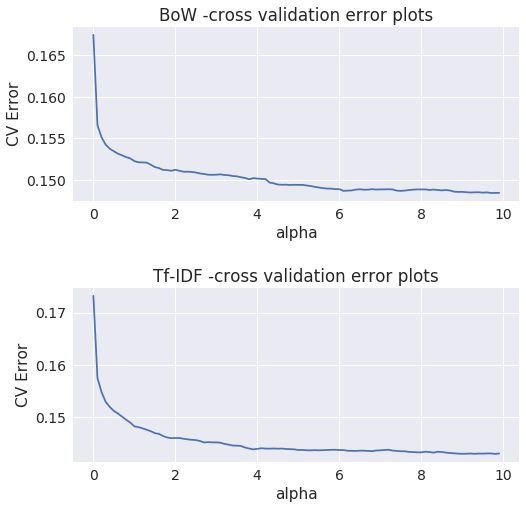

In [72]:
# Confusion Matrix
fig, (ax1, ax2)= plt.subplots(2,1, figsize=(8,8))
print('\t\t\tTable 1 - cross validation error plots')
print('\t\t\t~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.5)


ax1.plot(alpha, MSE_1)
ax1.set_title('BoW -cross validation error plots')
ax1.set_xlabel('alpha')
ax1.set_ylabel('CV Error')

ax2.plot(alpha,MSE_2)
ax2.set_title('Tf-IDF -cross validation error plots')
ax2.set_xlabel('alpha')
ax2.set_ylabel('CV Error')




In [73]:
# http://zetcode.com/python/prettytable/
from prettytable import PrettyTable
x = PrettyTable()
x.field_names = ["Model", "Hyper - Parameter", "Train Error", "Test Error"]

x.add_row(["BoW", alpha_BoW, Training_Error1, round(testError1,4)])
x.add_row(["TF-ID", alpha_tfidf, Training_Error2, round(testError2,4)])
print('\tTable 2 - Comparing Value of alpha, Train error and test error')
print('\t~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')

# print(x.get_string(title="Australian cities"))
print(x)

	Table 2 - Comparing Value of alpha, Train error and test error
	~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
+-------+-------------------+-------------+------------+
| Model | Hyper - Parameter | Train Error | Test Error |
+-------+-------------------+-------------+------------+
|  BoW  |       9.701       |    0.1484   |   0.1524   |
| TF-ID |       9.801       |    0.143    |   0.146    |
+-------+-------------------+-------------+------------+


In [74]:
print('\t\t\tTable 3 - Perfomance Measurements')
print('\t\t\t~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')


x = PrettyTable()
x.field_names = ["Model","Acc.", "f1(+ive)", "f1(-ive)",
                 "Pre(+ive)", "Pre(-ive)","Recall(+ive)", "Recall(-ive)",]

x.add_row(["BoW", Accuracy1*100, round(f1_1[1],4),round(f1_1[0],4), 
           round(p1[1],4),round(p1[0],4),round(r1[1],4),round(r1[1],4)])
x.add_row(["TF-ID",round(Accuracy2*100,2), round(f1_2[1],4),round(f1_2[0],4), 
           round(p2[1],4),round(p2[0],4),round(r2[1],4),round(r2[1],4)])

print(x)



			Table 3 - Perfomance Measurements
			~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
+-------+-------+----------+----------+-----------+-----------+--------------+--------------+
| Model |  Acc. | f1(+ive) | f1(-ive) | Pre(+ive) | Pre(-ive) | Recall(+ive) | Recall(-ive) |
+-------+-------+----------+----------+-----------+-----------+--------------+--------------+
|  BoW  | 84.76 |  0.8435  |  0.8514  |   0.8258  |   0.8691  |    0.862     |    0.862     |
| TF-ID |  85.4 |  0.8496  |  0.8581  |   0.8343  |   0.8732  |    0.8655    |    0.8655    |
+-------+-------+----------+----------+-----------+-----------+--------------+--------------+


			Table 4 - Confusion Matrix
			~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


Text(0.5,1,'TF-IDF - Confusion Matrix')

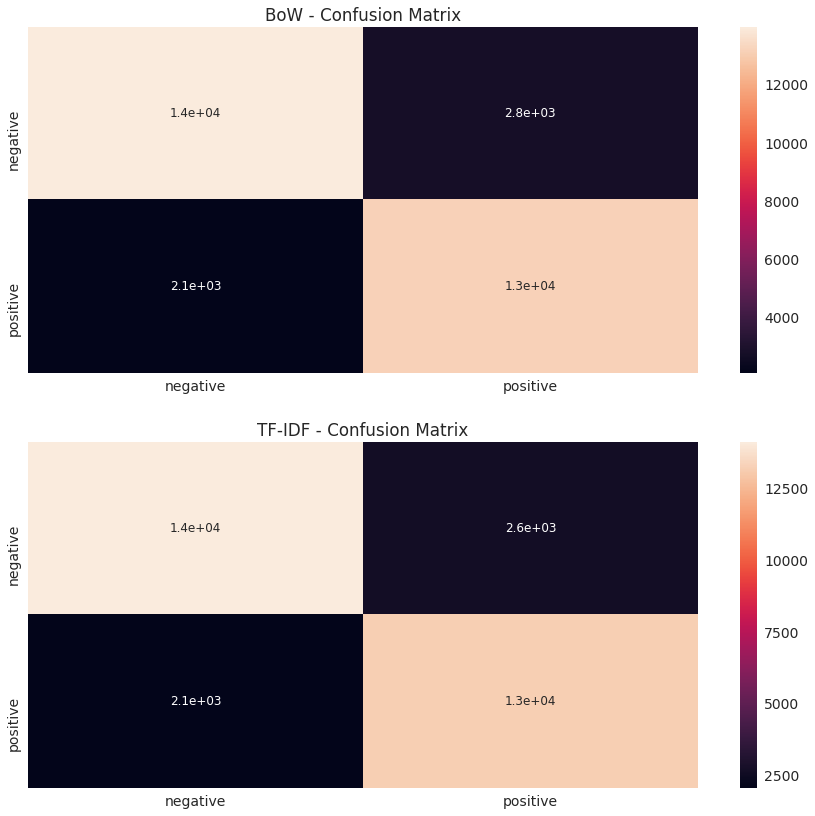

In [75]:
# Confusion Matrix
# fig, axs = plt.subplots(2,2, figsize=(8,8), sharey=True)
print('\t\t\tTable 4 - Confusion Matrix')
print('\t\t\t~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')

fig = plt.figure(figsize=(15,14))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)



sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm1, annot=True,annot_kws={"size": 12},ax=ax1)# font size
ax1.set_title('BoW - Confusion Matrix')


sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm2, annot=True,annot_kws={"size": 12},ax=ax2)# font size
ax2.set_title('TF-IDF - Confusion Matrix')
